In [43]:
import pandas as pd

In [2]:
#BHF = pd.read_csv("BHF_str.csv")
# Data Source: https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen
# Feiertage Schweiz
# Demonstrationen
# Density
# Pedestrian Dynamics?: https://github.com/PedestrianDynamics/PedPy/blob/main/notebooks/user_guide.ipynb

In [44]:
url_cs = "https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen/download/hystreet_fussgaengerfrequenzen_seit2021.csv"

BHF = pd.read_csv(
    url_cs,
    sep=',',
    encoding='utf-8',
)
BHF

,timestamp,location_id,location_name,ltr_label,rtl_label,weather_condition,temperature,pedestrians_count,unverified,ltr_pedestrians_count,...,zone_3_pedestrians_count,zone_3_ltr_pedestrians_count,zone_3_rtl_pedestrians_count,zone_3_adult_pedestrians_count,zone_3_child_pedestrians_count,zone_99_pedestrians_count,zone_99_ltr_pedestrians_count,zone_99_rtl_pedestrians_count,zone_99_adult_pedestrians_count,zone_99_child_pedestrians_count
0,2021-09-28T22:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.51,151,False,93,...,47.0,30.0,17.0,47.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-28T22:00:00Z,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,cloudy,13.51,118,False,35,...,40.0,10.0,30.0,40.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2021-09-28T22:00:00Z,330,Bahnhofstrasse (Süd),Bürkliplatz,Hauptbahnhof,cloudy,13.51,203,False,58,...,64.0,11.0,53.0,59.0,5.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-28T23:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.46,19,False,8,...,11.0,1.0,10.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2021-09-28T23:00:00Z,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,cloudy,13.46,7,False,2,...,4.0,0.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55720,2023-11-11T19:00:00Z,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,partly-cloudy-night,4.30,1585,True,816,...,607.0,227.0,380.0,607.0,0.0,NaN,NaN,NaN,NaN,NaN
55721,2023-11-11T19:00:00Z,330,Bahnhofstrasse (Süd),Bürkliplatz,Hauptbahnhof,partly-cloudy-night,4.30,1089,True,537,...,614.0,259.0,355.0,603.0,11.0,NaN,NaN,NaN,NaN,NaN
55722,2023-11-11T20:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,3.90,641,True,368,...,167.0,62.0,105.0,167.0,0.0,NaN,NaN,NaN,NaN,NaN
55723,2023-11-11T20:00:00Z,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,cloudy,3.90,510,True,268,...,193.0,73.0,120.0,193.0,0.0,NaN,NaN,NaN,NaN,NaN


In [28]:
from urllib.request import urlopen 
import json 
url_js = "https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen/download/hystreet_locations.json"

In [29]:
response = urlopen(url_js) 
data_json = json.loads(response.read()) 
json_df = pd.json_normalize(data_json["features"])
json_df

,type,id,geometry.type,geometry.coordinates,properties.hystreet_location_id,properties.name,properties.city
0,Feature,331,Polygon,"[[[8.538222, 47.374015], [8.538598, 47.374015]...",331,Bahnhofstrasse (Nord),Zürich
1,Feature,329,Polygon,"[[[8.538947, 47.370233], [8.539215, 47.370273]...",329,Bahnhofstrasse (Mitte),Zürich
2,Feature,330,Polygon,"[[[8.539939, 47.367523], [8.540229, 47.367581]...",330,Bahnhofstrasse (Süd),Zürich


In [46]:
import geopandas as gpd

geojson_gdf = gpd.GeoDataFrame.from_features(data_json["features"])
BHF_merged = pd.merge(BHF, geojson_gdf, how = "inner", left_on = "location_id", right_on = "hystreet_location_id")
BHF_merged.head(2)

,timestamp,location_id,location_name,ltr_label,rtl_label,weather_condition,temperature,pedestrians_count,unverified,ltr_pedestrians_count,...,zone_3_child_pedestrians_count,zone_99_pedestrians_count,zone_99_ltr_pedestrians_count,zone_99_rtl_pedestrians_count,zone_99_adult_pedestrians_count,zone_99_child_pedestrians_count,geometry,hystreet_location_id,name,city
0,2021-09-28T22:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.51,151,False,93,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich
1,2021-09-28T23:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.46,19,False,8,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich


In [47]:
gdf = gpd.GeoDataFrame(BHF_merged, geometry = gpd.GeoSeries(merged_data["geometry"]))

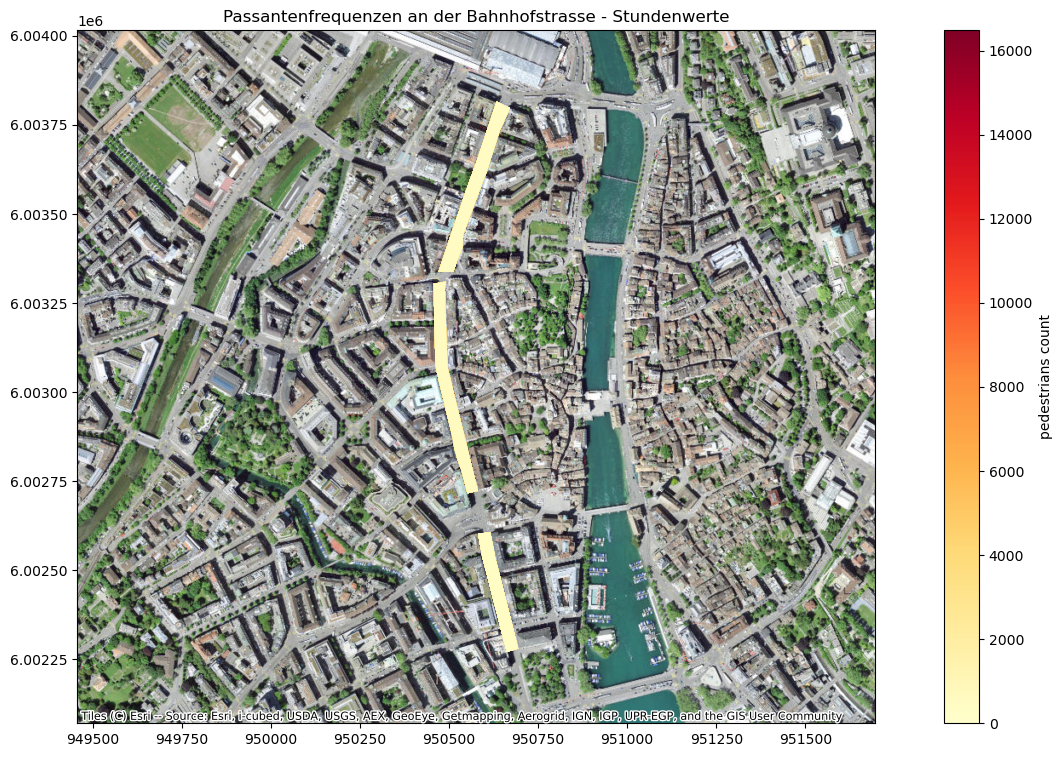

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Documentation: https://dlab.berkeley.edu/news/adding-basemaps-python-contextily
# 'EPSG:4326' is WGS84, the default CRS for GPS coordinates----------------------

gdf = gdf.set_crs("EPSG:4326") 

# Transform to Web Mercator (EPSG:3857)----------------------

gdf_3857 = gdf.to_crs("EPSG:3857")

# Create the plot----------------------

fig, ax = plt.subplots(figsize = (18, 9)) #--- faster ---
#fig, ax = plt.subplots(figsize = (30, 15)) --- for better rendering quality ---

gdf_3857.plot(ax=ax, column = "pedestrians_count", 
              cmap = "YlOrRd", 
              legend=True, 
              legend_kwds={'label': "pedestrians count"})
plt.title("Passantenfrequenzen an der Bahnhofstrasse - Stundenwerte")

# Padding for left and right sides----------------------

extra_space_lr = 1000 

# Padding for top and bottom----------------------

extra_space_tb = 200  

total_bounds = gdf_3857.total_bounds
x_min, y_min, x_max, y_max = total_bounds

# Adjust the limits to include more area around both GeoDataFrame and basemap----------------------

ax.set_xlim(x_min - extra_space_lr, x_max + extra_space_lr)
ax.set_ylim(y_min - extra_space_tb, y_max + extra_space_tb)

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)  

plt.grid(visible=False)
plt.show()


In [88]:
# Consistency Analysis----------------------

# Count columns and rows----------------------

print(f"Count rows: {len(BHF_merged)}")
print(f"Count columns: {len(BHF_merged.columns)}")
print()

# Entries after 03.03.2022 are consistent (Dataset Description)----------------------

BHF_merged["timestamp"] = pd.to_datetime(BHF_merged["timestamp"], format="%Y-%m-%dT%H:%M:%SZ")
entries_before_030322 = BHF_merged[BHF_merged["timestamp"] < "2022-03-03"]
entries_after_030322 = BHF_merged[BHF_merged["timestamp"] >= "2022-03-03"]

print(f"Count entries before 03.03.2022: {len(entries_before_030322)}")
print(f"Count entries after 03.03.2022: {len(entries_after_030322)}")


# BHF info----------------------

print(BHF_merged.info())
print()

# Let's say the unverified column proofs consistency----------------------

consistent_data = BHF_merged[BHF_merged["timestamp"] >= "2022-03-03"]
reliable_data = consistent_data[consistent_data["unverified"] == False]

print(f"Count consistent data: {len(reliable_data)}")

Count rows: 55725
Count columns: 41

Count entries before 03.03.2022: 11166
Count entries after 03.03.2022: 44559
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55725 entries, 0 to 55724
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        55725 non-null  datetime64[ns]
 1   location_id                      55725 non-null  int64         
 2   location_name                    55725 non-null  object        
 3   ltr_label                        55725 non-null  object        
 4   rtl_label                        55725 non-null  object        
 5   weather_condition                55725 non-null  object        
 6   temperature                      55725 non-null  float64       
 7   pedestrians_count                55725 non-null  int64         
 8   unverified                       55725 non-null  bool          
 9   ltr_pedestria

In [56]:
BHF_after_030322 = entries_after_030322.drop(columns = ["zone_99_pedestrians_count", 
                    "zone_99_ltr_pedestrians_count", 
                    "zone_99_rtl_pedestrians_count", 
                    "zone_99_adult_pedestrians_count", 
                    "zone_99_child_pedestrians_count"])

In [174]:
BHF_dummies = pd.get_dummies(BHF_after_030322, columns=["weather_condition"])

In [183]:
BHF_dummies["year"] = BHF_dummies["timestamp"].dt.year
BHF_dummies["month"] = BHF_dummies["timestamp"].dt.month
BHF_dummies["day"] = BHF_dummies["timestamp"].dt.day
BHF_dummies["hour"] = BHF_dummies["timestamp"].dt.hour


In [184]:
BHF_dummies = BHF_dummies.sort_values(by = ["location_id", "timestamp"])
BHF_dummies.head()
Zone_329 = BHF_dummies[BHF_dummies["location_id"] == 329]
Zone_330 = BHF_dummies[BHF_dummies["location_id"] == 330]
Zone_331 = BHF_dummies[BHF_dummies["location_id"] == 331]

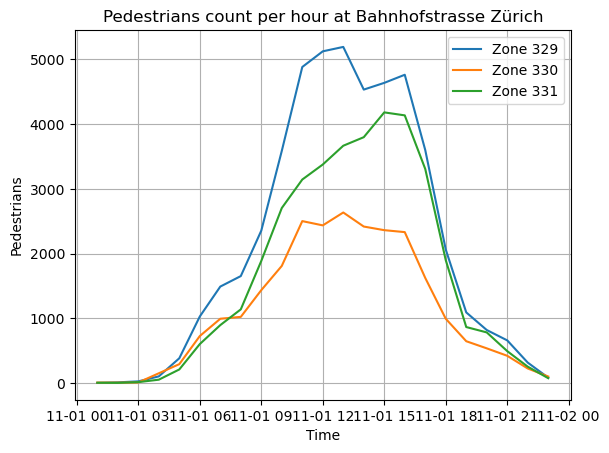

In [188]:
start_date = pd.to_datetime("2023-11-01T00:00:01Z", format="%Y-%m-%dT%H:%M:%SZ")
end_date = pd.to_datetime("2023-11-01T23:59:59Z", format="%Y-%m-%dT%H:%M:%SZ")

plot_zone_329 = Zone_329[(Zone_329["timestamp"] >= start_date) & (Zone_329["timestamp"] <= end_date)]
plot_zone_330 = Zone_330[(Zone_330["timestamp"] >= start_date) & (Zone_330["timestamp"] <= end_date)]
plot_zone_331 = Zone_331[(Zone_331["timestamp"] >= start_date) & (Zone_331["timestamp"] <= end_date)]

fig, ax = plt.subplots()
ax.plot(plot_zone_329["timestamp"], plot_zone_329["pedestrians_count"], label="Zone 329")
ax.plot(plot_zone_330["timestamp"], plot_zone_330["pedestrians_count"], label="Zone 330")
ax.plot(plot_zone_331["timestamp"], plot_zone_331["pedestrians_count"], label="Zone 331")

ax.set_xlabel("Time")
ax.set_ylabel("Pedestrians")
ax.set_title("Pedestrians count per hour at Bahnhofstrasse Zürich")
ax.legend()
ax.grid()

plt.show()


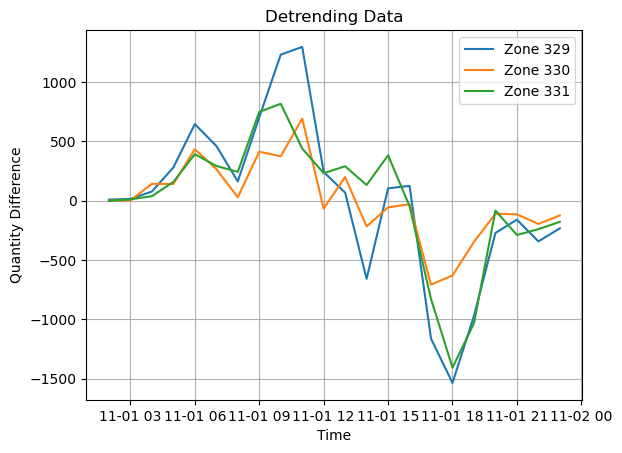

In [189]:
import numpy as np

BHF_pedestrians_diff_329 = np.diff(plot_zone_329["pedestrians_count"].values)
BHF_pedestrians_diff_330 = np.diff(plot_zone_330["pedestrians_count"].values)
BHF_pedestrians_diff_331 = np.diff(plot_zone_331["pedestrians_count"].values)

fig, ax = plt.subplots()
ax.plot(plot_zone_329["timestamp"][1:], BHF_pedestrians_diff_329, label="Zone 329")
ax.plot(plot_zone_330["timestamp"][1:], BHF_pedestrians_diff_330, label="Zone 330")
ax.plot(plot_zone_331["timestamp"][1:], BHF_pedestrians_diff_331, label="Zone 331")

ax.set_xlabel("Time")
ax.set_ylabel("Quantity Difference")
ax.set_title("Detrending Data")
ax.legend()
ax.grid()

plt.show()


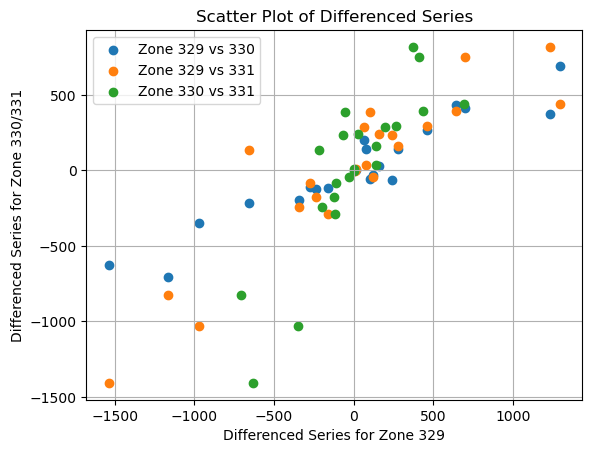

In [190]:
fig, ax = plt.subplots()
ax.scatter(BHF_pedestrians_diff_329, BHF_pedestrians_diff_330, label="Zone 329 vs 330")
ax.scatter(BHF_pedestrians_diff_329, BHF_pedestrians_diff_331, label="Zone 329 vs 331")
ax.scatter(BHF_pedestrians_diff_330, BHF_pedestrians_diff_331, label="Zone 330 vs 331")

ax.set_xlabel("Differenced Series for Zone 329")
ax.set_ylabel("Differenced Series for Zone 330/331")
ax.set_title("Scatter Plot of Differenced Series")
ax.legend()
ax.grid()

plt.show()

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [194]:
BHF_dummies.head()

,timestamp,location_id,location_name,ltr_label,rtl_label,temperature,pedestrians_count,unverified,ltr_pedestrians_count,rtl_pedestrians_count,...,weather_condition_fog,weather_condition_partly-cloudy-day,weather_condition_partly-cloudy-night,weather_condition_rain,weather_condition_snow,weather_condition_wind,year,month,day,hour
3722,2022-03-03 00:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,1.09,17,False,6,11,...,0,0,1,0,0,0,2022,3,3,0
3723,2022-03-03 01:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,0.52,16,False,8,8,...,0,0,1,0,0,0,2022,3,3,1
3724,2022-03-03 02:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,0.28,5,False,1,4,...,0,0,1,0,0,0,2022,3,3,2
3725,2022-03-03 03:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,-0.58,15,False,4,11,...,0,0,0,0,0,0,2022,3,3,3
3726,2022-03-03 04:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,-1.47,114,False,59,55,...,0,0,0,0,0,0,2022,3,3,4


In [198]:
# Adding sine and cosine features is a way to represent cyclical patterns in data, ensuring that the model 
# understands the circular nature of time-related variables and prevents misinterpretation of the relationship 
# between values that are close in the cyclical space. It's a useful preprocessing step, particularly when 
# working with machine learning models that might struggle to capture cyclical patterns using linear 
# representations.

def add_sin_and_cos_features(df, column_to_transform):
    df['Sin_{}'.format(column_to_transform)] = np.sin(2 * np.pi * df[column_to_transform] / max(df[column_to_transform])) 
    df['Cos_{}'.format(column_to_transform)] = np.cos(2 * np.pi * df[column_to_transform] / max(df[column_to_transform]))
    return df

# Time refers to the hour of the day 0-23 (makes sense that this is cyclical - relationship between 23 and 0)
BHF_new = add_sin_and_cos_features(BHF_dummies, "hour")
# Month number from 1-12 (makes sense that this is cyclical - relationship between 12 and 1)
BHF_new = add_sin_and_cos_features(BHF_dummies, "month")
# Weekday number from 1-7 (maybe doesnt make sense that this is cyclical - doesn't really follow a logical pattern?
BHF_new = add_sin_and_cos_features(BHF_dummies, "day")
BHF_new

,timestamp,location_id,location_name,ltr_label,rtl_label,temperature,pedestrians_count,unverified,ltr_pedestrians_count,rtl_pedestrians_count,...,year,month,day,hour,Sin_hour,Cos_hour,Sin_month,Cos_month,Sin_day,Cos_day
3722,2022-03-03 00:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,1.09,17,False,6,11,...,2022,3,3,0,0.000000,1.000000,1.0,6.123234e-17,0.571268,0.820763
3723,2022-03-03 01:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,0.52,16,False,8,8,...,2022,3,3,1,0.269797,0.962917,1.0,6.123234e-17,0.571268,0.820763
3724,2022-03-03 02:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,0.28,5,False,1,4,...,2022,3,3,2,0.519584,0.854419,1.0,6.123234e-17,0.571268,0.820763
3725,2022-03-03 03:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,-0.58,15,False,4,11,...,2022,3,3,3,0.730836,0.682553,1.0,6.123234e-17,0.571268,0.820763
3726,2022-03-03 04:00:00,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,-1.47,114,False,59,55,...,2022,3,3,4,0.887885,0.460065,1.0,6.123234e-17,0.571268,0.820763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37145,2023-11-11 16:00:00,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,7.00,4583,True,2009,2574,...,2023,11,11,16,-0.942261,-0.334880,-0.5,8.660254e-01,0.790776,-0.612106
37146,2023-11-11 17:00:00,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,6.00,3389,True,1657,1732,...,2023,11,11,17,-0.997669,-0.068242,-0.5,8.660254e-01,0.790776,-0.612106
37147,2023-11-11 18:00:00,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,4.40,2138,True,1033,1105,...,2023,11,11,18,-0.979084,0.203456,-0.5,8.660254e-01,0.790776,-0.612106
37148,2023-11-11 19:00:00,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,4.30,1585,True,816,769,...,2023,11,11,19,-0.887885,0.460065,-0.5,8.660254e-01,0.790776,-0.612106
